### import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
data=pd.read_csv("gold_price_data.csv")
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [3]:
data.shape

(2290, 6)

#### EDA

In [4]:
data.columns

Index(['Date', 'SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

#### Convert Col Date from obj to datatime

In [7]:
data.Date.dtype


dtype('O')

In [8]:
data.Date=pd.to_datetime(data.Date)


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


#### Correlation between attributes 

In [10]:
data.corr()

,Date,SPX,GLD,USO,SLV,EUR/USD
Date,1.000000,0.944033,0.209118,-0.782230,-0.174108,-0.794540
SPX,0.944033,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.209118,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.782230,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.174108,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.794540,-0.672017,-0.024375,0.829317,0.321631,1.000000


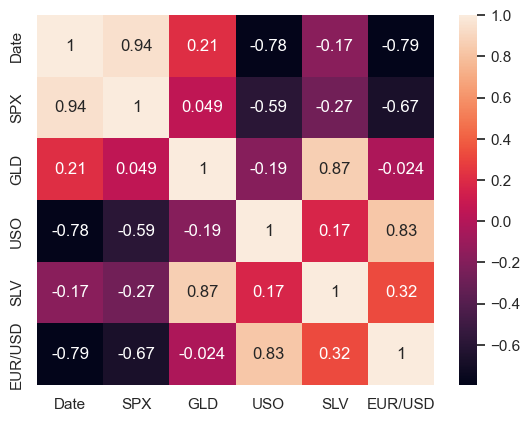

In [11]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [12]:
corr=data.corr()

In [13]:
print(corr['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


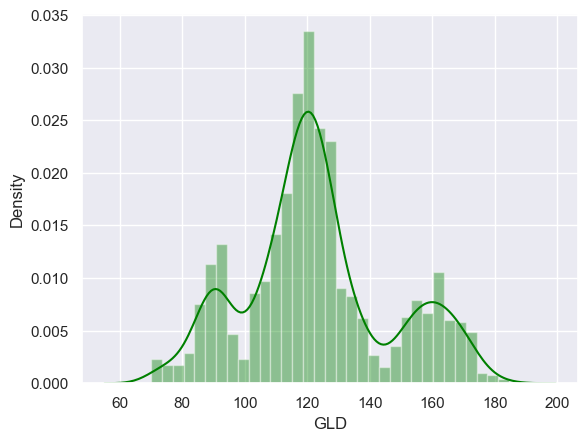

In [14]:
sns.distplot(data.GLD,color='Green')
plt.show()

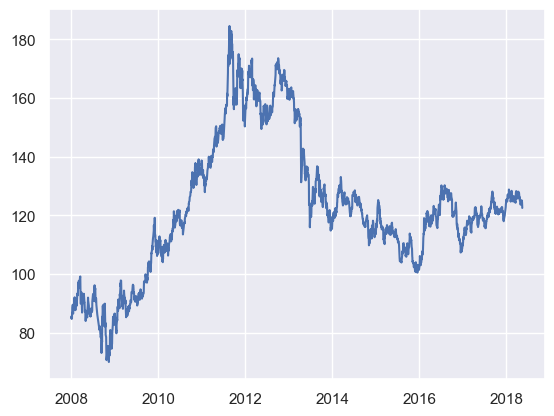

In [15]:
plt.plot(data['Date'],data['GLD'])
plt.show()

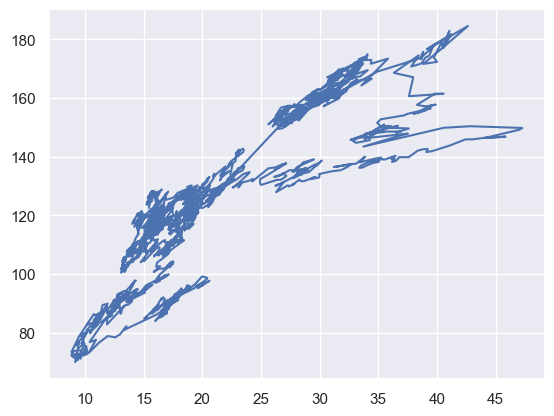

In [16]:
plt.plot(data['SLV'],data['GLD'])
plt.show()

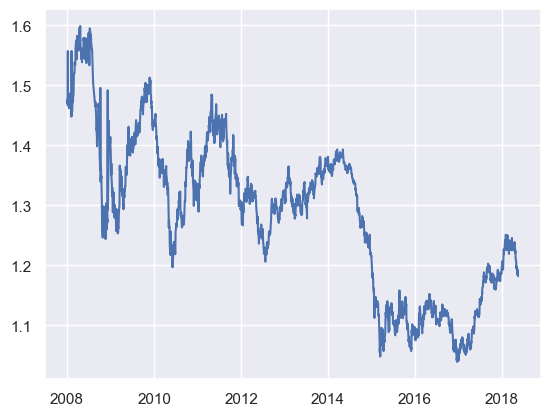

In [17]:
plt.plot(data['Date'],data['EUR/USD'])
plt.show()

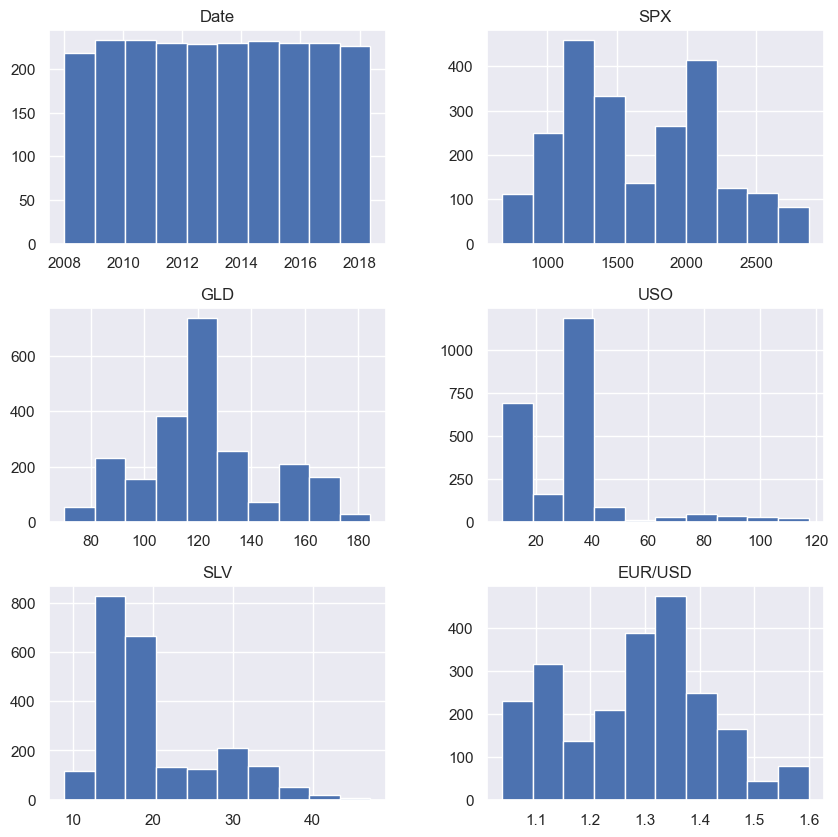

In [18]:
data.hist(figsize=(10,10))
plt.show()

#### Observing Outliers

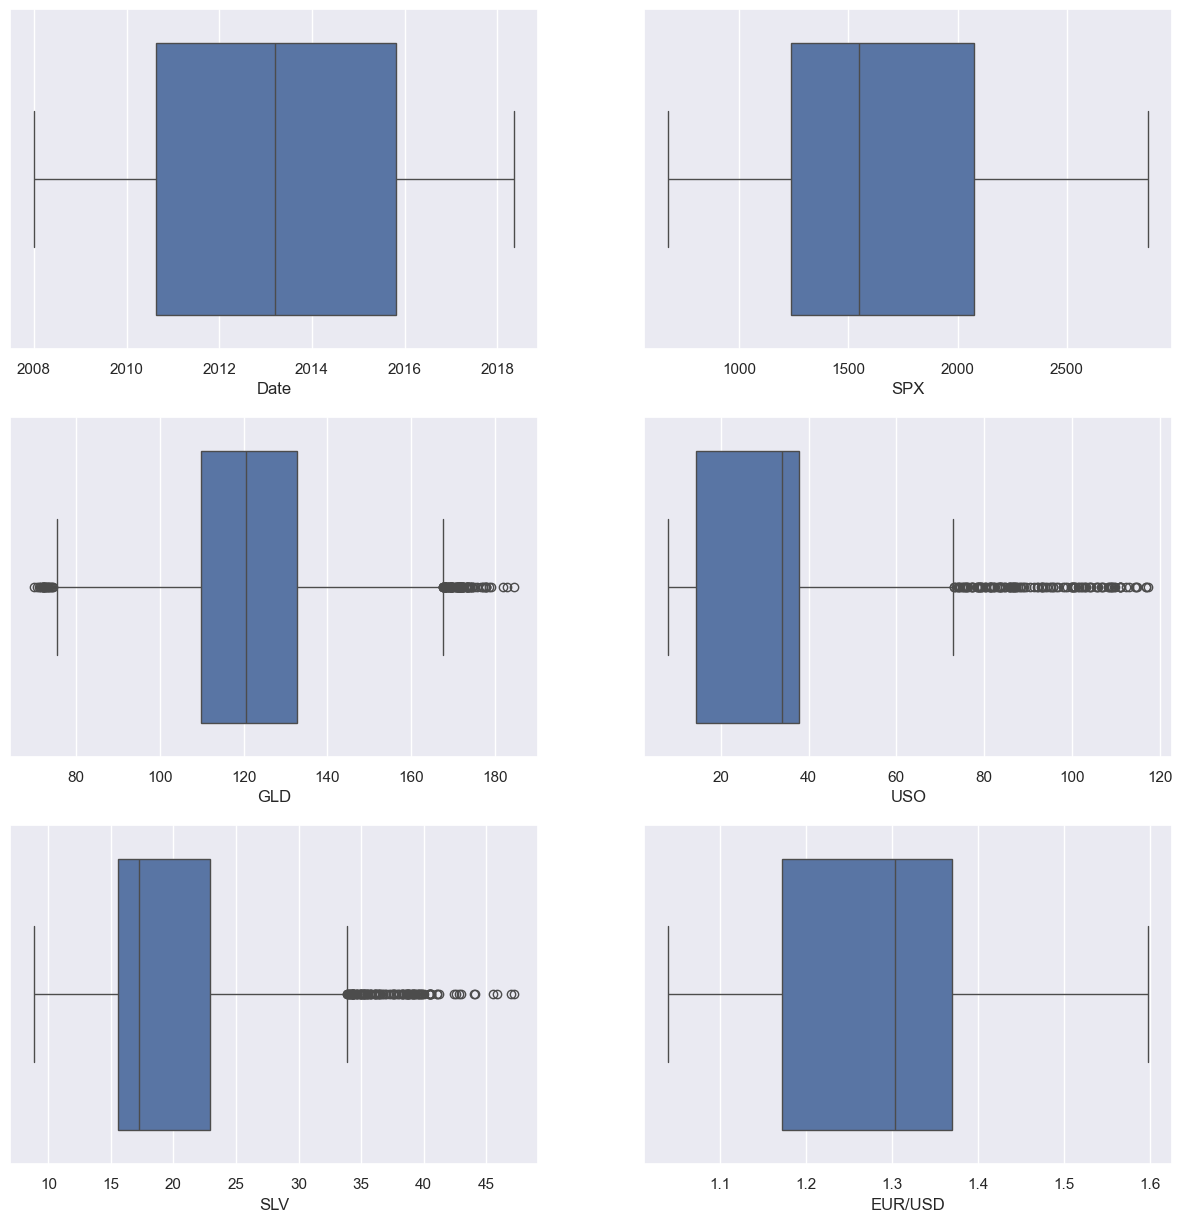

In [19]:
plt.figure(figsize=(15,15))
for i,col in enumerate (['Date','SPX','GLD','USO','SLV','EUR/USD']):
    plt.subplot(3,2,i+1)
    sns.boxplot(data,x=col)
    
plt.show()

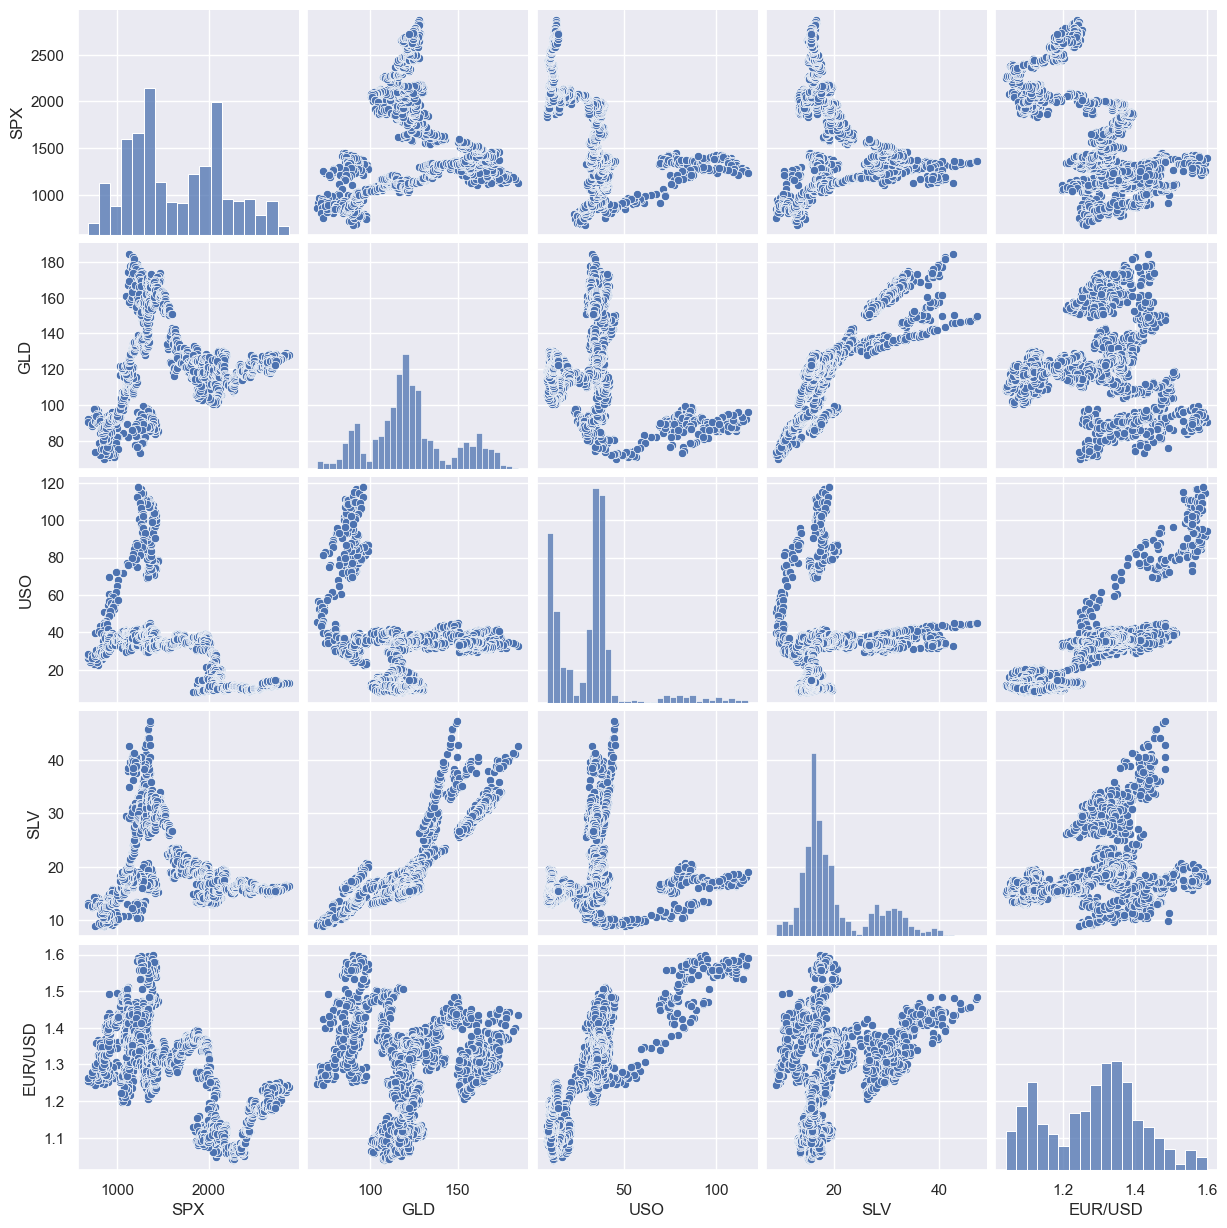

In [20]:
sns.pairplot(data)
plt.show()

## Build Model

In [21]:
X=data.drop(['Date','EUR/USD'],axis=1)
y=data['EUR/USD']

In [22]:
X.head()

,SPX,GLD,USO,SLV
0,1447.160034,84.860001,78.470001,15.180
1,1447.160034,85.570000,78.370003,15.285
2,1411.630005,85.129997,77.309998,15.167
3,1416.180054,84.769997,75.500000,15.053
4,1390.189941,86.779999,76.059998,15.590


In [23]:
y.head()

0    1.471692
1    1.474491
2    1.475492
3    1.468299
4    1.557099
Name: EUR/USD, dtype: float64

In [24]:
X.head()

,SPX,GLD,USO,SLV
0,1447.160034,84.860001,78.470001,15.180
1,1447.160034,85.570000,78.370003,15.285
2,1411.630005,85.129997,77.309998,15.167
3,1416.180054,84.769997,75.500000,15.053
4,1390.189941,86.779999,76.059998,15.590


In [25]:
# Standardization
X=((X-X.mean())/X.std())
X.head()

,SPX,GLD,USO,SLV
0,-0.399058,-1.626608,2.388288,-0.691569
1,-0.399058,-1.596114,2.383166,-0.676764
2,-0.467502,-1.615012,2.328872,-0.693402
3,-0.458737,-1.630473,2.236164,-0.709475
4,-0.508804,-1.544146,2.264847,-0.633762


In [26]:
y.head()

0    1.471692
1    1.474491
2    1.475492
3    1.468299
4    1.557099
Name: EUR/USD, dtype: float64

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


In [28]:
len(X_train),len(X_test)

(1832, 458)

#### Random Forest 

In [29]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()


In [30]:
# training the model 

regressor.fit(X_train,y_train)
regressor.score(X_test,y_test)

0.9799581945177318

#### Evaluation

In [31]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
y_pred_randomf=regressor.predict(X_test)


In [32]:
print('MAE :'," ", mean_absolute_error(y_test,y_pred_randomf))


MAE :   0.011620646419213954


In [33]:
print('MSE :'," ", mean_squared_error(y_test,y_pred_randomf))


MSE :   0.000320902058153538


In [34]:
print('RMAE :'," ", np.sqrt(mean_squared_error(y_test,y_pred_randomf)))


RMAE :   0.01791373936824855
